## Importing Libraries

In [124]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Input
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Model
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.utils import plot_model
%matplotlib inline
import numpy as np

## Data Preprocessing

In [125]:
#rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures
#width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
#rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.
#shear_range is for randomly applying shearing transformations
#zoom_range is for randomly zooming inside pictures
#horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).
#fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

#DATA AUGUMENTATION PARAMETERS WE CAN USE
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

### Data Augumentation for Training data

In [126]:
# Data Augumentation for the training dataset

# We need to see images from each and every angle

#Rescaling
#Shear_range
#Zoom_range
#Horizontal_flip


train_datagen = ImageDataGenerator(
        rescale=1./255, # Changing the scale of the image from 0-255 to 0-1 for fast computation
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [127]:
train_generator = train_datagen.flow_from_directory(
        'dataset/training',  # training directory
        target_size=(200, 200),  # all images will be resized to 200*200
        batch_size=15,
        class_mode='binary')  # we are using binary classification here with binary cross-entropy loss

Found 160 images belonging to 2 classes.


In [140]:
label_map = (train_generator.class_indices)

In [141]:
label_map

{'daffodil': 0, 'snowdrop': 1}

(500, 689, 3)


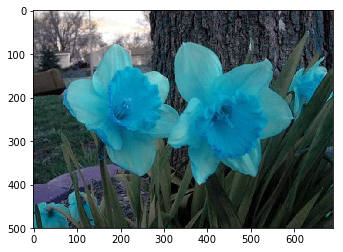

In [128]:
# Daffodil Image
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
cv_img = cv2.imread("dataset/training/daffodil/image_0001.jpg")
print(cv_img.shape)
plt.imshow(cv_img)
#plt.show(cv_img)

(500, 666, 3)


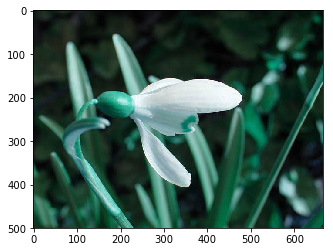

In [129]:
# Daffodil Image
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
cv_img = cv2.imread("dataset/training/snowdrop/image_0081.jpg")
print(cv_img.shape)
plt.imshow(cv_img)
#plt.show(cv_img)

In [130]:
import glob
cv_img = []
for img in glob.glob("C:/Users/gagan/Machine Learning/image classification/dataset/training/daffodil/*.jpg"):
    n= cv2.imread(img)
    cv_img.append(n)

(500, 666, 3)


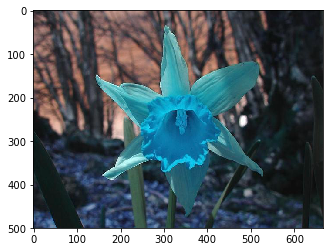

In [131]:
# Change index for looking different images of deffodil and its shape 
index = 1
plt.imshow(cv_img[index])
print(cv_img[index].shape)

## Model Structure

In [132]:
def model(input_shape):
    X_input = Input(input_shape)
    X = ZeroPadding2D((2, 2))(X_input)
    
    # layer group1 
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv1')(X)
    #X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool1')(X)
                              
    #layer group2 
    #X = ZeroPadding2D((2, 2))(X)
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv2')(X)
    #X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool2')(X)
                              
    #layer group3 
    #X = ZeroPadding2D((1, 1))(X)
    # CONV -> BN -> RELU Block applied to X
    #X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv3')(X)
    #X = BatchNormalization(axis = 3, name = 'bn3')(X)
    #X = Activation('relu')(X)
    #X = MaxPooling2D((2, 2), name='max_pool3')(X)
                                  
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(64, activation='relu', name='fc1')(X)
    X = Dense(1, activation='sigmoid', name='fc2')(X)
                              
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='FlowerClassification')
                              
    return model

In [133]:
Model = model((200,200,3))

In [134]:
Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 200, 200, 3)       0         
_________________________________________________________________
zero_padding2d_20 (ZeroPaddi (None, 204, 204, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 202, 202, 32)      896       
_________________________________________________________________
activation_23 (Activation)   (None, 202, 202, 32)      0         
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 101, 101, 32)      0         
_________________________________________________________________
conv2 (Conv2D)               (None, 99, 99, 32)        9248      
_________________________________________________________________
activation_24 (Activation)   (None, 99, 99, 32)        0         
__________

In [115]:
Model.save('model.h5')

## Compile the Model

In [135]:
Model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

## Train the Model

In [136]:
Model.fit_generator(train_generator,epochs=10,steps_per_epoch = 80)

Epoch 1/10
80/80 [==============================] - 97s - loss: 0.2458 - acc: 0.9183      

## Checking Model on unseen image


[[1.]]


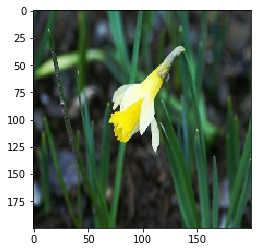

In [163]:
img_path = 'dataset/training/daffodil/image_0070.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(200,200))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

g=Model.predict(x)
print(g)
#if p<0:
    # P=0 for deffodil,P=1 for snowdrop
    #print("Deffodil")
#elif p==1:
    #print("Snowdrop")

In [ ]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

plot_model(Model, to_file='Model.png')
SVG(model_to_dot(Model).create(prog='dot', format='svg'))